In [4]:
from fastai.vision.all import * ## 이미지분석
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트 분석
from fastai.vision.gan import * ## GAN (이미지 생성)

In [3]:
import pandas as pd

# 지난시간 복습 

## 1단계 : 데이터 정리

`-` 데이터를 정리해서 'dls' 객체에 저장

In [6]:
path = untar_data(URLs.PETS)/"images"

In [9]:
path.ls() ## 파일 목록

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_58.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_270.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_150.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_143.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_225.jpg')...]

In [11]:
fnames = get_image_files(path)

In [12]:
fnames ## 이미지들의 리스트를 경로와 함께 저장

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_58.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_270.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_150.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_143.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_121.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_225.jpg')...]

`-` path.ls 와 fnames의 차이 $\to$ path.ls는 모든 파일들을 리스트로 리턴, fnames는 이미지 파일만 리턴한 것임

`-` 아래는 이미지 데이터 로드함수

[python]
```
ImageDataLoaders.from_name_func(
  path,
  fnames,
  #label_func,
  item_tfms = Resize(224)    
)
```

`-` 지난 시간 함수 

In [14]:
def f(fname) :
    if fname[0].isupper() :
        return "cat"
    else :
        return "dog"

`-` 지난시간 함수 lambda 로 구현
 

In [16]:
f = lambda fname : "cat" if fname[0].isupper() else "dog"

In [17]:
dls =ImageDataLoaders.from_name_func(
  path,
  fnames,
  f,
  item_tfms = Resize(224)    
)

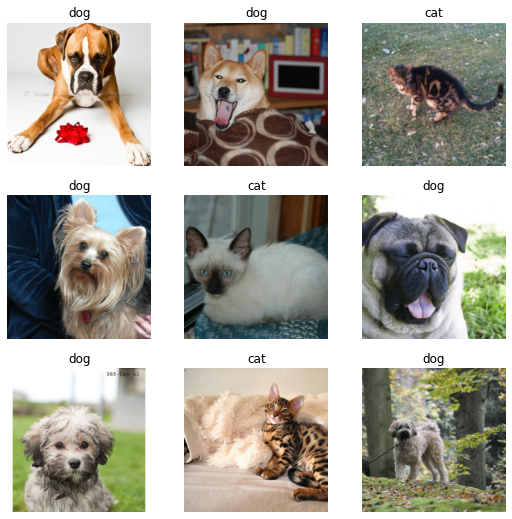

In [18]:
dls.show_batch()

## 2단계 : Irnr 오브젝트 생성

In [24]:
##cnn_learner??

In [23]:
##vision_learner??

In [25]:
lrnr = cnn_learner(dls,resnet34,metrics = error_rate)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [26]:
id(dls)

140201663392160

In [28]:
id(lrnr.dls)

140201663392160

`-` 둘의 메모리 공간 주소가 같다.

## 3단계 : Irnr.학습()

* **fine_tune()** 모든 가중치를 학습하는 것이 아니라 일부만 학습하는 것임.
* fine_tune을 직역하면 미세조정이다.
* 즉, 주어진 환경에 맞게 이미 학습된 데이터를 마지막에 미세한 조정을 주어서 다시 학습한다. 이것을 `transfer learning` 이라고한다.

In [31]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.141714,0.015523,0.007442,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.046919,0.023695,0.006766,00:10


* fine_tune()이외의 방법으로 학습할 수도 있음 $\to$ fit 함수로도 가능

## 4단계 : lnnr.예측()

(방법 1) : lrnr.predict()함수를 이용

In [32]:
lrnr.predict(fnames[0])

('cat', TensorBase(0), TensorBase([9.9900e-01, 9.9530e-04]))

(방법2) : lrrnr.model(X)를 이용 : X의 shape이 (?,3,224,224)의 형태의 텐서이어야 한다.

In [36]:
#dir(lrnr.model) ##__call 이라고 되어있으면 함수처럼 사용가능

* 이미지를 넘겨주면 에러출력 $\to$ 컴퓨터가 이해할 수 있는 숫자로 보내주어야 한다.

In [37]:
lrnr.model(fnames[0])

TypeError: ignored

In [41]:
_rtn = dls.one_batch()

In [46]:
type(_rtn)
#_rtn

tuple

In [47]:
len(_rtn)

2

In [48]:
X,y = dls.one_batch()

In [49]:
X.shape # 224는 이미지 사이즈를 우리가 잡았던 것, 3은 채널(빨강, 노랑, 초록), 64는 이미지의 수

torch.Size([64, 3, 224, 224])

In [52]:
y.shape

torch.Size([64])

In [55]:
y[:4]

TensorCategory([1, 1, 1, 1], device='cuda:0')

In [56]:
lrnr.model(X)[:4]

TensorBase([[-4.0604,  6.3253],
            [-6.1767,  7.2553],
            [-2.5415,  3.9088],
            [-5.6635,  6.0049]], device='cuda:0', grad_fn=<AliasBackward0>)

* 즉 `X`를 모델 학습에 넘겨주고 `y`가 0인지 1인지 맞춘다. 왼쪽에 있는 숫자가 클수록 0, 오른쪽에 있는 숫자가 클수록 1이라고 예측한다.

* `lrnr.model(X)` 활성화함수 직전 상태 즉, `softmax`로 넘어가기전 `y_hat`이 되기 직전인 상태이다.

In [58]:
X[0].shape ## 한장의 이미지 shape

torch.Size([3, 224, 224])

In [64]:
lrnr.model(X[0]) ## 4차원 텐서를 넣어야 하는데 3차원 텐서를 넣어서 에러가 발생

ValueError: ignored

In [66]:
lrnr.model(X[:1]) ## 이런식으로 넣어주면 가능!

TensorBase([[-4.0608,  6.3263]], device='cuda:0', grad_fn=<AliasBackward0>)

## 프로그래밍 과정

`-` overview

1. dls 오브젝트 생성

2. lrnr 오브젝트 생성

3. lrnr.학습()

4. lrnr.예측()

# 추천시스템 실습

## 1단계 : dls 생성

* 임의의 커피, 홍차 맛 만족도 데이터

In [ ]:
https://raw.githubusercontent.com/guebin/STML2022/main/posts/I.%20Overview/2022-09-08-rcmd_view.csv

In [69]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/STML2022/main/posts/I.%20Overview/2022-09-08-rcmd_view.csv')
df_view.head()

,커피1,커피2,커피3,커피4,커피5,커피6,커피7,커피8,커피9,커피10,홍차1,홍차2,홍차3,홍차4,홍차5,홍차6,홍차7,홍차8,홍차9,홍차10
0,4.149209,NaN,NaN,4.078139,4.033415,4.071871,NaN,NaN,NaN,NaN,1.142659,1.109452,NaN,0.603118,1.084308,NaN,0.906524,NaN,NaN,0.903826
1,4.031811,NaN,NaN,3.822704,NaN,NaN,NaN,4.071410,3.996206,NaN,NaN,0.839565,1.011315,NaN,1.120552,0.911340,NaN,0.860954,0.871482,NaN
2,4.082178,4.196436,NaN,3.956876,NaN,NaN,NaN,4.450931,3.972090,NaN,NaN,NaN,NaN,0.983838,NaN,0.918576,1.206796,0.913116,NaN,0.956194
3,NaN,4.000621,3.89557,NaN,3.838781,3.967183,NaN,NaN,NaN,4.105741,1.147554,NaN,1.346860,NaN,0.614099,1.297301,NaN,NaN,NaN,1.147545
4,NaN,NaN,NaN,NaN,3.888208,NaN,3.97033,3.979490,NaN,4.010982,NaN,0.920995,1.081111,0.999345,NaN,1.195183,NaN,0.818332,1.236331,NaN


In [72]:
df_view.shape

(100, 20)

`-` 위 데이터는 컴퓨터가 좋아하는 데이터 타입은 아님

`-` 아래와 같은 데이터  타입이 컴퓨터가 좋아하는 데이터 형태!

In [75]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/STML2022/main/posts/I.%20Overview/2022-09-08-rcmd_anal.csv')
df.head()

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4


In [82]:
dls = CollabDataLoaders.from_df(df)

In [83]:
dls.show_batch() ## 데이터들의 뭉치를 보여준다고 생각

,user,item,rating
0,38,10,4.050465
1,42,20,1.292435
2,99,5,0.927884
3,6,18,1.124469
4,81,18,4.178587
5,97,13,4.071385
6,97,14,3.935935
7,86,10,0.878860
8,10,10,3.947756
9,81,3,1.140266


In [85]:
type(dls.one_batch())

tuple

In [86]:
len(dls.one_batch())

2

In [87]:
X, y = dls.one_batch()

In [88]:
X[:5]

tensor([[94, 18],
        [48, 15],
        [49, 12],
        [96,  8],
        [42, 20]])

In [89]:
y[:5]

tensor([[4.1571],
        [1.3672],
        [0.9212],
        [0.6784],
        [1.2924]])

* 평점이 `y`, X의 2번째 열은 `item`의 인덱스 즉, 커피, 홍차의 `인덱스`이다.

- 유저는 1-100 까지, 아이템은 1-20 까지 번호가 매겨짐

In [97]:
df.user.unique(), df.item.unique()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]))

## 2단계 : lrnr 생성

In [98]:
?collab_learner

In [99]:
lrnr = collab_learner(dls,y_range = (0,5))

## 3단계 : 학습

In [100]:
lrnr.fit(5)

epoch,train_loss,valid_loss,time
0,2.303518,2.387814,00:00
1,2.296435,2.382961,00:00
2,2.290963,2.361562,00:00
3,2.273144,2.310360,00:00
4,2.237350,2.212338,00:00


## 4단계 : 예측

In [107]:
!nvidia-smi ## gpu 메모리에 데이터를 올려야 gpu를 쓸 수 있다.
            ## 현재 40960MIB 중에, 6508MIB를 쓴거

Mon Feb 13 03:02:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    52W / 400W |   6508MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* 동작을 하지 않는 이유 $\to$ 데이터를 GPU메모리에 올리지 않았기 때문, 즉 `X`를 GPU에 올리지않았음

In [108]:
lrnr.model(X.to("cuda:0"))

tensor([2.6203, 2.4078, 2.4296, 2.4147, 2.4379, 2.4201, 2.5469, 2.3894, 2.4491,
        2.5716, 2.4053, 2.5628, 2.5315, 2.5821, 2.4122, 2.5509, 2.4293, 2.4100,
        2.3865, 2.5788, 2.4476, 2.4217, 2.4088, 2.4145, 2.5559, 2.5627, 2.4015,
        2.4415, 2.4449, 2.4041, 2.5609, 2.4372, 2.5280, 2.5970, 2.5629, 2.5665,
        2.5634, 2.4260, 2.5410, 2.3713, 2.4034, 2.4298, 2.5526, 2.5474, 2.4270,
        2.5978, 2.5144, 2.4287, 2.5997, 2.3872, 2.3990, 2.4277, 2.4715, 2.4507,
        2.4164, 2.5287, 2.6307, 2.4279, 2.4225, 2.5513, 2.3779, 2.4348, 2.5664,
        2.3808], device='cuda:0', grad_fn=<AddBackward0>)

In [110]:
y.reshape(-1)

tensor([4.1571, 1.3672, 0.9212, 0.6784, 1.2924, 1.2927, 4.4312, 1.1095, 0.6699,
        4.2545, 1.3018, 4.1020, 4.1378, 3.9670, 1.0989, 4.1546, 0.9216, 1.6479,
        0.7114, 4.3233, 0.8254, 0.9476, 1.2973, 1.2095, 4.0181, 4.1052, 1.0210,
        1.1272, 1.0811, 0.9954, 3.8129, 1.2068, 3.7339, 3.7450, 3.7918, 3.9419,
        3.9602, 1.1130, 4.0269, 0.8396, 0.6148, 1.0967, 3.9091, 3.6707, 1.2705,
        4.3294, 3.8896, 0.9221, 4.0591, 0.7438, 0.5774, 0.9987, 1.0781, 1.4077,
        1.2158, 3.7970, 3.9063, 0.8789, 0.9647, 3.9110, 0.9113, 1.4332, 4.0734,
        0.7531])

* 가만보니까 예측을 한것이 아니라 걍 찍는 것같음.

* 다시 10번학습, 총 15번 학습한것!

In [111]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,2.024679,2.062938,00:00
1,1.915701,1.863412,00:00
2,1.786727,1.625497,00:00
3,1.634479,1.367636,00:00
4,1.463962,1.107142,00:00
5,1.286827,0.865784,00:00
6,1.110320,0.655676,00:00
7,0.942005,0.483732,00:00
8,0.786892,0.351725,00:00
9,0.649683,0.254381,00:00


In [112]:
lrnr.model(X.to("cuda:0"))

tensor([3.8132, 1.3016, 1.3479, 1.3472, 1.3713, 1.3401, 3.6193, 1.2546, 1.3294,
        3.7289, 1.2876, 3.6382, 3.5721, 3.5878, 1.3477, 3.6536, 1.3710, 1.4517,
        1.2269, 3.6255, 1.4529, 1.3778, 1.2844, 1.3243, 3.6570, 3.4017, 1.2812,
        1.3968, 1.3998, 1.2739, 3.5619, 1.2896, 3.5557, 3.7600, 3.5782, 3.5810,
        3.6740, 1.3642, 3.6071, 1.2202, 1.3395, 1.3461, 3.6561, 3.6573, 1.3087,
        3.7091, 3.5337, 1.3310, 3.7013, 1.3189, 1.3117, 1.3816, 1.4482, 1.4022,
        1.3442, 3.5761, 3.7976, 1.3848, 1.2933, 3.5884, 1.2519, 1.4102, 3.6621,
        1.2266], device='cuda:0', grad_fn=<AddBackward0>)

In [113]:
y.reshape(-1)

tensor([4.1571, 1.3672, 0.9212, 0.6784, 1.2924, 1.2927, 4.4312, 1.1095, 0.6699,
        4.2545, 1.3018, 4.1020, 4.1378, 3.9670, 1.0989, 4.1546, 0.9216, 1.6479,
        0.7114, 4.3233, 0.8254, 0.9476, 1.2973, 1.2095, 4.0181, 4.1052, 1.0210,
        1.1272, 1.0811, 0.9954, 3.8129, 1.2068, 3.7339, 3.7450, 3.7918, 3.9419,
        3.9602, 1.1130, 4.0269, 0.8396, 0.6148, 1.0967, 3.9091, 3.6707, 1.2705,
        4.3294, 3.8896, 0.9221, 4.0591, 0.7438, 0.5774, 0.9987, 1.0781, 1.4077,
        1.2158, 3.7970, 3.9063, 0.8789, 0.9647, 3.9110, 0.9113, 1.4332, 4.0734,
        0.7531])

* 전 보단 결과가 좋으나 아직까지도 자신감이 부족함

In [116]:
lrnr.fit(20)

epoch,train_loss,valid_loss,time
0,0.140063,0.186549,00:00
1,0.115944,0.139581,00:00
2,0.097311,0.109824,00:00
3,0.082672,0.090060,00:00
4,0.071270,0.077270,00:00
5,0.062843,0.069694,00:00
6,0.056643,0.064374,00:00
7,0.051726,0.060618,00:00
8,0.047778,0.058101,00:00
9,0.044731,0.056307,00:00


In [117]:
lrnr.model(X.to("cuda:0"))

tensor([4.1396, 1.0046, 0.9150, 0.9528, 1.0421, 1.0685, 3.9525, 0.8296, 0.9267,
        4.1958, 1.0089, 3.9822, 3.9842, 3.9823, 1.0656, 4.0215, 1.0202, 1.1260,
        0.9742, 4.1417, 1.0290, 1.0583, 1.0669, 1.0596, 3.9959, 3.9538, 1.0101,
        1.0808, 1.0498, 1.0109, 4.0697, 1.0221, 3.8955, 3.9628, 4.0330, 4.0100,
        4.1104, 1.0817, 3.9374, 0.8868, 0.9833, 1.0597, 3.9288, 3.9056, 0.9954,
        4.1319, 3.9341, 1.0133, 4.0659, 0.8576, 0.9358, 0.9670, 1.0936, 1.0714,
        1.1292, 3.8640, 3.9320, 0.9894, 0.9393, 3.8178, 0.9363, 1.1871, 3.9079,
        0.9397], device='cuda:0', grad_fn=<AddBackward0>)

In [118]:
y.reshape(-1)

tensor([4.1571, 1.3672, 0.9212, 0.6784, 1.2924, 1.2927, 4.4312, 1.1095, 0.6699,
        4.2545, 1.3018, 4.1020, 4.1378, 3.9670, 1.0989, 4.1546, 0.9216, 1.6479,
        0.7114, 4.3233, 0.8254, 0.9476, 1.2973, 1.2095, 4.0181, 4.1052, 1.0210,
        1.1272, 1.0811, 0.9954, 3.8129, 1.2068, 3.7339, 3.7450, 3.7918, 3.9419,
        3.9602, 1.1130, 4.0269, 0.8396, 0.6148, 1.0967, 3.9091, 3.6707, 1.2705,
        4.3294, 3.8896, 0.9221, 4.0591, 0.7438, 0.5774, 0.9987, 1.0781, 1.4077,
        1.2158, 3.7970, 3.9063, 0.8789, 0.9647, 3.9110, 0.9113, 1.4332, 4.0734,
        0.7531])

* 이제 거의 비슷해짐

`-` 이제 없는 데이터를 예측해보자.

`-` 첫번째 유저가 커피 2를 먹었을 때? $\to$ 예상 4점 근처

In [120]:
X[0:1]

tensor([[94, 18]])

In [122]:
lrnr.model(tensor([[1,2]])) ## 첫 번째 유저가 커피2를 먹었을 때

RuntimeError: ignored

`-` 에러가 나는 이유는 데이터가 하나는 gpu, 하나는 cpu에 있기 때문이다.

In [123]:
Xnew = tensor([[1,2]])

In [124]:
lrnr.model(Xnew.to("cuda:0"))

tensor([4.0007], device='cuda:0', grad_fn=<AddBackward0>)

`-` 우리가 예상한 결과가 나온다!

# 텍스트분석 실습

`-` RNN 사용

`-` "h e l l o" 라는 단어를 학습하고 `h`를 넘겨주면 다음 문자를 맞추는 것을 학습

`-` 사실 단어 단위, 문장단위로 학습할 수도 있음.

## 1단계 : dls 생성

In [126]:
df = pd.DataFrame({'text':['h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??']*20000})
df.head()

,text
0,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
1,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
2,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
3,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
4,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??


In [129]:
dls = TextDataLoaders.from_df(df,text_col="text",is_lm=True)

`-` is_lm = True는 단어에 대한 예측, is_lm = False는 긍정, 부정과 같이 이 텍스트가 최종적으로 어떤 클래스에 속하는지 예측한다.

In [130]:
dls.show_batch()

,text,text_
0,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o,h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o .
1,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o
2,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l
3,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l
4,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e
5,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h
6,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos
7,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?
8,! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?


`-`  `xxbos`는 하나의 내용이 끝나고 다른 내용이 시작된다는 의미

* `text`와, `text_`의 차이는 `text`는 예측전, `text_`는 예측 후라고 생각하자. $\to$ 즉, X와 y

## 2단계 : lrnr 생성

In [131]:
lnnr = language_model_learner(dls,arch=AWD_LSTM)

## 3단계 : 학습

In [132]:
lnnr.fit(5)

epoch,train_loss,valid_loss,time
0,1.965570,0.897048,00:22
1,1.031884,0.373120,00:21
2,0.640392,0.251359,00:21
3,0.492017,0.212869,00:21
4,0.389751,0.186374,00:21


## 4단계 : 예측

In [133]:
lnnr.predict('h e',n_words=30)

'h e l l o ? h e l l o ! h e l l o ? ? h e l l o ! h e l l o !'

* 오 예측이 되게 잘됬당

# GAN intro

`-` 저자 : 이안굿펠로우 (지도교수 : 요수아벤지오)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어(2014년 시점, 얀르쿤)

`-` 생성모형 : 만들수 없다면 이해하지 못한것이다, 리처드 파인만 (천재 물리학자)

`-` 개라는 단어를 주면 개를 그린다.

`-` 즉, 이미지를 생성하는 모형을 만들어본다.

## 생성모형

`-` 데이터의 생성확률 $p(\bf{x}, y)$ 을 알면 클래스의 사후확률  $p(y|\bf{x})$ 를 알 수 있음(일반적인 예측모형), 하지만 역은 불가능

`-` 생성모형은 $p(x,y)$에 관심이 있다. 따라서, 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능

## GAN의 원리

`-` 생성모형중 하나

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다.

> 
The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistiguishable from the genuine articles.


`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate)

`-` 상황극 : 경찰이 CNN, 위조범이 GAN

* 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림)
* 경찰: (위조범이 만든 돈을 보고) 이건 가짜다!
* 위조범: 걸렸군.. 더 정교하게 만들어야지..
* 경찰: 이건 진짠가?… –> 상사에게 혼남. 그것도 구분못하냐고
* 위조범: 더 정교하게 만들자..
* 경찰: 더 판별능력을 업그레이드 하자!
* 반복..

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다.

# GAN 실습

## 1단계 : dls 생성

In [134]:
path = untar_data(URLs.MNIST_SAMPLE)

In [135]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

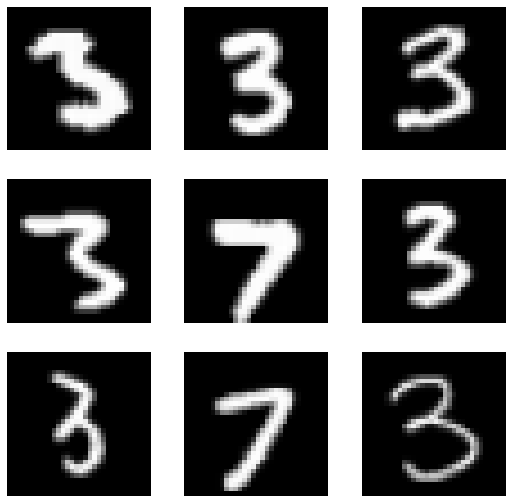

In [137]:
dls.show_batch()

## 2단계 : lrnr 생성

`-` 재료가 되는 경찰과 위조지폐범을 만듬

`-` 위조지폐범의 32 : 입력데이터를 32 x 32로 생성해라

`-` police의 32 :  32 x 32로 입력을 받아 0또는 1로 출력을해라

In [138]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1) 
police = basic_critic(32,n_channels=3,n_extra_layers=1)

`-` 위조지폐범과 경찰을 집어넣음

In [139]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

## 3단계 : 학습

In [141]:
lrnr.fit(60)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.501905,0.272452,0.272452,-0.732317,00:05
1,-0.560972,0.261339,0.261339,-0.738020,00:05
2,-0.426593,0.238372,0.238372,-0.638903,00:05
3,-0.549378,0.277994,0.277994,-0.735531,00:05
4,-0.530167,0.310435,0.310435,-0.731865,00:05
5,-0.546979,0.303683,0.303683,-0.734299,00:06
6,-0.439625,0.263317,0.263317,-0.623146,00:06
7,-0.501293,0.257658,0.257658,-0.528969,00:06
8,-0.301703,0.209601,0.209601,-0.312943,00:06
9,-0.424916,0.251544,0.251544,-0.586661,00:05


`-` 가짜 숫자의 결과

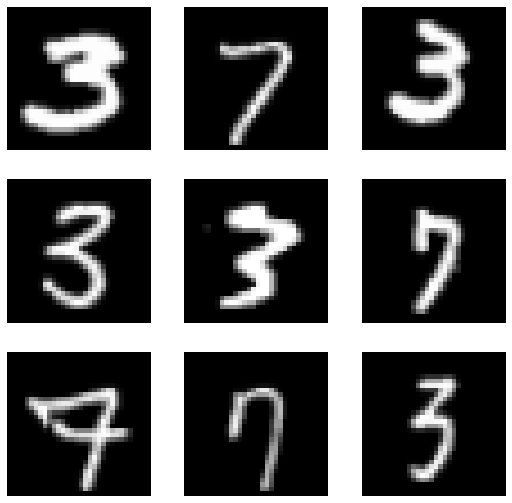

In [145]:
dls.show_batch()

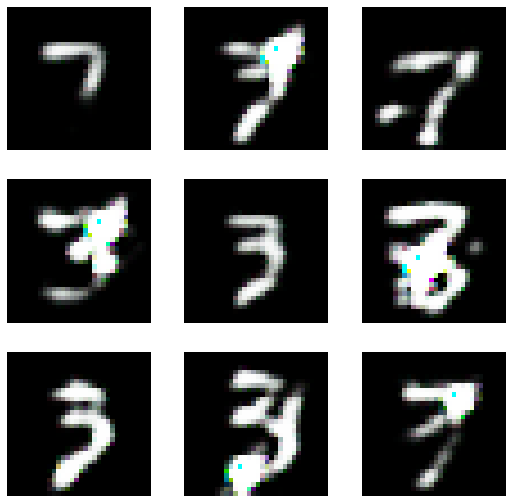

In [142]:
lrnr.show_results()

## 4단계 : 없음